In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
data = pd.read_csv('../DataSets/training-a/REFERENCE.csv')
data.head(5)

,a0001,1
0,a0002,1
1,a0003,1
2,a0004,1
3,a0005,1
4,a0006,1


In [11]:
data.shape

(408, 2)

In [29]:

y, sr = librosa.load('../DataSets/training-a/a0001.wav',offset=5, duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

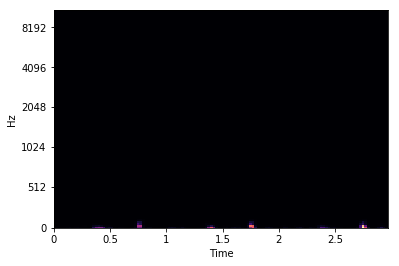

In [30]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [68]:
D = [] # Dataset new
for row in data.itertuples():
    for i in np.arange(0,30,2.97):
            y, sr = librosa.load('../DataSets/training-a/' + row[1] + '.wav',offset=i, duration=2.97)
            ps = librosa.feature.melspectrogram(y=y, sr=sr)
            print(row[1])
            if ps.shape != (128, 128): break
            D.append(ps)
                
            
    

a0002
a0002
a0002
a0002
a0002
a0002
a0002
a0002
a0003
a0003
a0003
a0003
a0003
a0003
a0003
a0003
a0003
a0003
a0003
a0004
a0004
a0004
a0004
a0004
a0004
a0004
a0004
a0004
a0004
a0004
a0005
a0005
a0005
a0005
a0005
a0005
a0005
a0005
a0005
a0005
a0005
a0006
a0006
a0006
a0006
a0006
a0006
a0006
a0007
a0007
a0007
a0007
a0007
a0007
a0007
a0007
a0007
a0007
a0007
a0008
a0008
a0008
a0008
a0008
a0008
a0008
a0008
a0008
a0008
a0008
a0009
a0009
a0009
a0009
a0009
a0009
a0009
a0009
a0009
a0009
a0009
a0010
a0010
a0010
a0010
a0010
a0010
a0010
a0010
a0010
a0010
a0010
a0011
a0011
a0011
a0011
a0011
a0011
a0011
a0011
a0011
a0011
a0011
a0012
a0012
a0012
a0012
a0012
a0012
a0012
a0012
a0012
a0012
a0012
a0013
a0013
a0013
a0013
a0013
a0013
a0013
a0013
a0013
a0013
a0013
a0014
a0014
a0014
a0014
a0014
a0014
a0014
a0014
a0014
a0014
a0014
a0015
a0015
a0015
a0015
a0015
a0015
a0015
a0015
a0015
a0015
a0015
a0016
a0016
a0016
a0016
a0016
a0016
a0016
a0016
a0016
a0016
a0016
a0017
a0017
a0017
a0017
a0017
a0017
a0017
a0017
a001

a0131
a0131
a0131
a0131
a0131
a0132
a0132
a0132
a0132
a0132
a0132
a0132
a0132
a0132
a0132
a0132
a0133
a0133
a0133
a0133
a0133
a0133
a0133
a0133
a0133
a0133
a0133
a0134
a0134
a0134
a0134
a0134
a0134
a0134
a0134
a0134
a0134
a0134
a0135
a0135
a0135
a0135
a0135
a0135
a0135
a0135
a0135
a0135
a0135
a0136
a0136
a0136
a0136
a0136
a0136
a0136
a0136
a0136
a0136
a0136
a0137
a0137
a0137
a0137
a0137
a0137
a0137
a0137
a0137
a0137
a0137
a0138
a0138
a0138
a0138
a0138
a0138
a0138
a0138
a0139
a0139
a0139
a0139
a0139
a0139
a0139
a0139
a0139
a0139
a0139
a0140
a0140
a0140
a0140
a0140
a0140
a0140
a0140
a0140
a0140
a0140
a0141
a0141
a0141
a0141
a0141
a0141
a0141
a0141
a0141
a0141
a0141
a0142
a0142
a0142
a0142
a0142
a0142
a0142
a0142
a0142
a0142
a0142
a0143
a0143
a0143
a0143
a0143
a0143
a0143
a0143
a0143
a0143
a0143
a0144
a0144
a0144
a0144
a0144
a0144
a0144
a0144
a0144
a0144
a0144
a0145
a0145
a0145
a0145
a0145
a0145
a0145
a0145
a0145
a0145
a0145
a0146
a0146
a0146
a0146
a0146
a0146
a0146
a0146
a0146
a0146
a014

a0260
a0260
a0261
a0261
a0261
a0261
a0261
a0261
a0261
a0261
a0261
a0261
a0261
a0262
a0262
a0262
a0262
a0262
a0262
a0262
a0262
a0262
a0262
a0262
a0263
a0263
a0263
a0263
a0263
a0263
a0263
a0263
a0263
a0263
a0263
a0264
a0264
a0264
a0264
a0264
a0264
a0264
a0264
a0264
a0264
a0264
a0265
a0265
a0265
a0265
a0265
a0265
a0265
a0265
a0266
a0266
a0266
a0266
a0266
a0266
a0266
a0266
a0266
a0266
a0266
a0267
a0267
a0267
a0267
a0267
a0267
a0267
a0268
a0268
a0268
a0268
a0268
a0268
a0268
a0268
a0268
a0268
a0268
a0269
a0269
a0269
a0269
a0269
a0269
a0269
a0269
a0269
a0269
a0269
a0270
a0270
a0270
a0270
a0270
a0270
a0270
a0270
a0270
a0270
a0270
a0271
a0271
a0271
a0271
a0271
a0271
a0271
a0271
a0271
a0271
a0271
a0272
a0272
a0272
a0272
a0272
a0272
a0272
a0272
a0272
a0272
a0272
a0273
a0273
a0273
a0273
a0273
a0273
a0273
a0273
a0273
a0273
a0273
a0274
a0274
a0274
a0274
a0274
a0274
a0274
a0274
a0274
a0274
a0274
a0275
a0275
a0275
a0275
a0275
a0275
a0275
a0275
a0275
a0275
a0275
a0276
a0276
a0276
a0276
a0276
a0276
a027

a0391
a0391
a0391
a0391
a0391
a0391
a0391
a0391
a0392
a0392
a0392
a0392
a0392
a0392
a0392
a0392
a0392
a0392
a0392
a0393
a0393
a0393
a0393
a0393
a0393
a0393
a0393
a0393
a0393
a0393
a0394
a0394
a0394
a0394
a0394
a0394
a0394
a0394
a0394
a0395
a0395
a0395
a0395
a0395
a0396
a0396
a0396
a0396
a0396
a0396
a0396
a0396
a0396
a0396
a0396
a0397
a0397
a0397
a0397
a0397
a0397
a0397
a0397
a0397
a0397
a0397
a0398
a0398
a0398
a0398
a0398
a0398
a0398
a0398
a0398
a0398
a0398
a0399
a0399
a0399
a0399
a0399
a0399
a0399
a0399
a0399
a0399
a0399
a0400
a0400
a0400
a0400
a0400
a0400
a0401
a0401
a0401
a0401
a0401
a0401
a0401
a0401
a0401
a0401
a0401
a0402
a0402
a0402
a0402
a0402
a0402
a0402
a0402
a0402
a0402
a0402
a0403
a0403
a0403
a0403
a0403
a0403
a0403
a0403
a0403
a0403
a0403
a0404
a0404
a0404
a0404
a0404
a0404
a0404
a0404
a0404
a0404
a0404
a0405
a0405
a0405
a0405
a0405
a0406
a0406
a0406
a0406
a0406
a0406
a0406
a0406
a0406
a0406
a0406
a0407
a0407
a0407
a0407
a0407
a0407
a0407
a0407
a0407
a0407
a0407
a0408
a040

In [72]:
print("Number of samples: ", len(D))

Number of samples:  4141


In [73]:
#need for shuffle 
dataset = D
random.shuffle(dataset)

In [74]:
train = dataset[:4000]
test = dataset[4000:]

In [78]:
X_train = np.array([x.reshape( (128, 128, 1) ) for x in train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in test])

In [80]:
X_train.shape

(4000, 128, 128, 1)